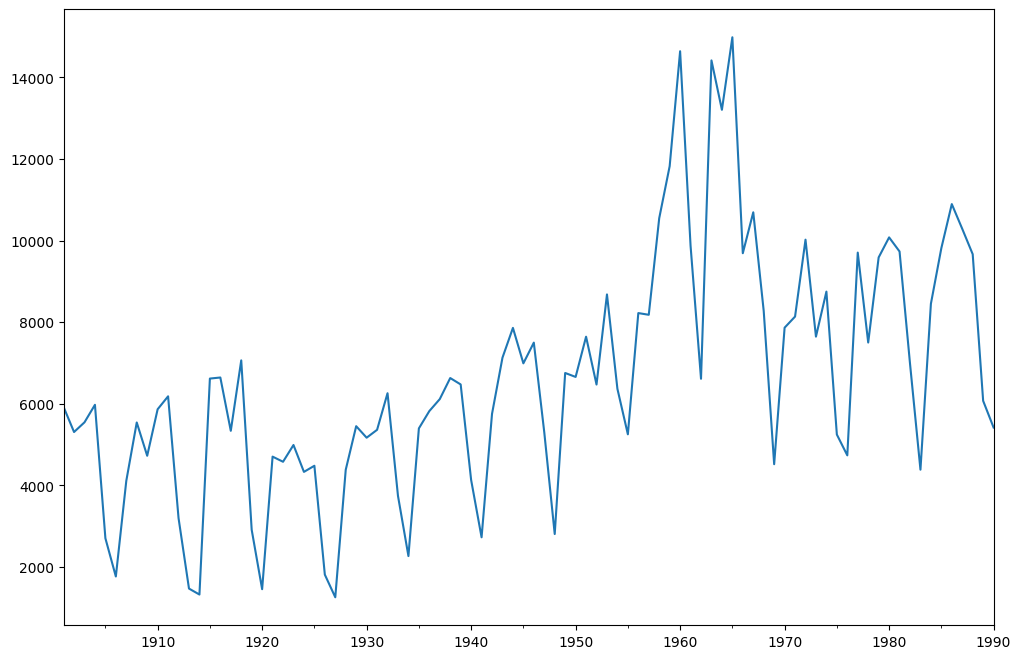

AIC: 1619.6323


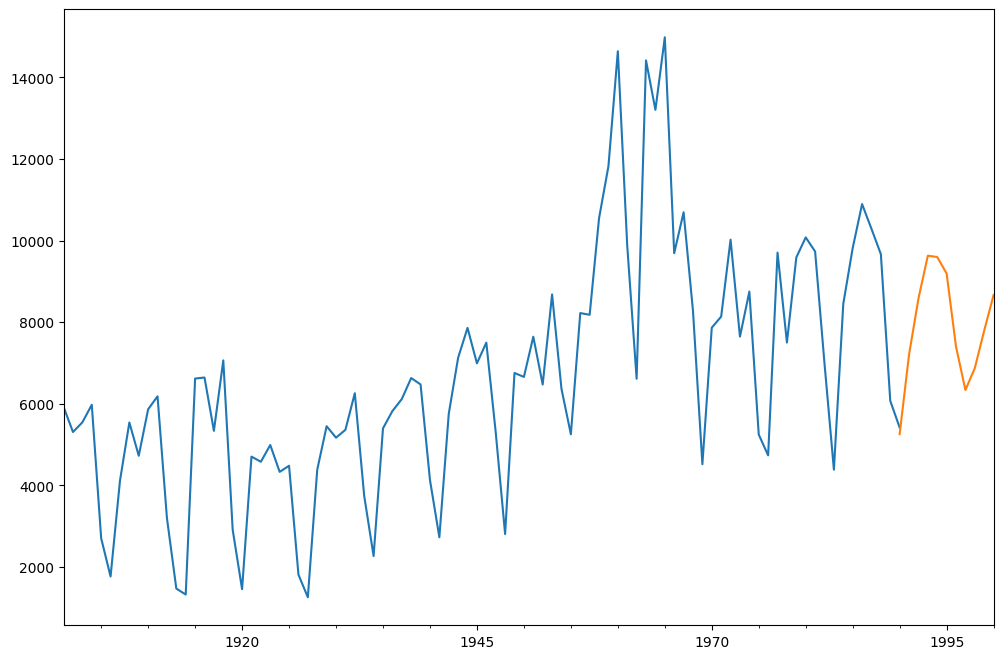

In [7]:
# ARMA demo
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
import warnings

warnings.filterwarnings('ignore')

# create data
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data = Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901', '1990')

# draw the image
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

# create ARMA model
arma = ARMA(data, (7,0)).fit()
print('AIC: %.4lf' % arma.aic)

# Model prediction
predict_y = arma.predict('1990', '2000')

# draw prediction
fig, ax = plt.subplots(figsize=(12,8))
ax = data.loc['1901':].plot(ax = ax)
predict_y.plot(ax = ax)
plt.show()


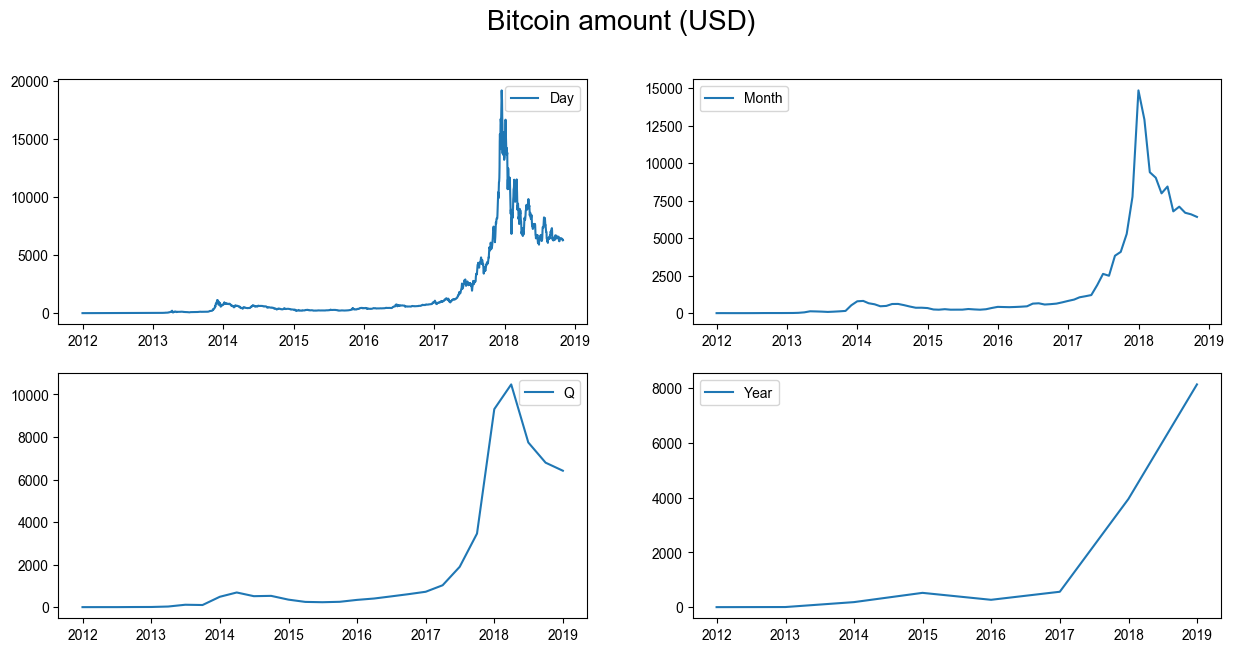

error param: (0, 2)
best model:                               ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.764
Date:                Sat, 21 Aug 2021   AIC                           1385.522
Time:                        21:39:05   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2100.3147   1567.137      1.340      0.180    -971.218    5171.847
ar.L1.Weighted_Price     0.9251      0.042     22.043      0.000     

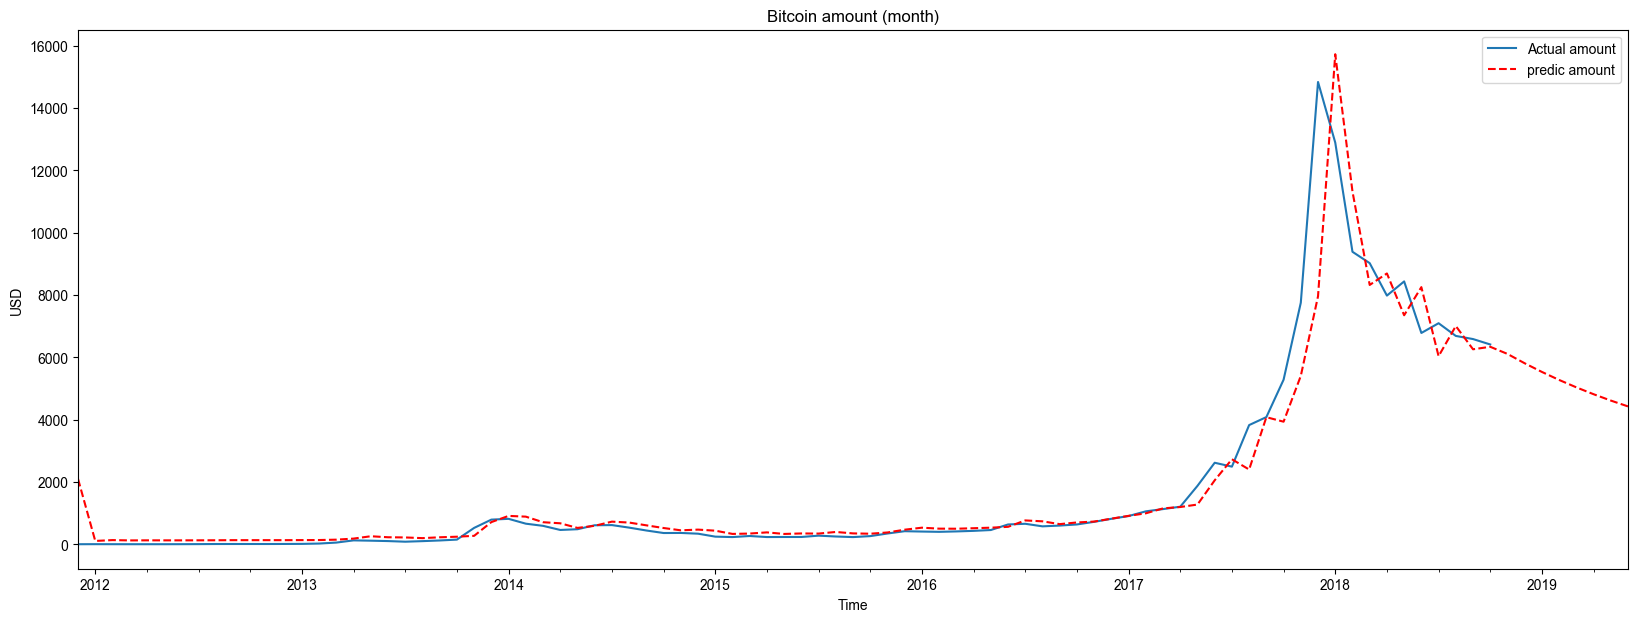

In [16]:
# Bitcoin trends

"""
Timestamp: 日期
Open： 开盘价
High： 最高价
Low： 最低价
Close： 收盘价
Volume_(BTC)： 比特币成交量
Volume_(Currency)： 成交金额
Weighted_Price： 比特币平均价格
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime

# load data
df = pd.read_csv('./data/bitcoin_2012-01-01_to_2018-10-31.csv')

# use time as index of data
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df.head(5)

#  Statistics by month, quarter and year
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

# Display the trend of Bitcoin according to the day, month , quarter, and year
fig = plt.figure(figsize = [15, 7])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.suptitle('Bitcoin amount (USD)', fontsize = 20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='Day')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label = 'Month')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label = 'Q')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label = 'Year')
plt.legend()
plt.show()

# set param 
ps = range(0,3)
qs = range(0,3)
parameters = product(ps, qs)
parameters_list = list(parameters)

# search best param for ARMA model, => best_aic
results = []
best_aic = float('inf') # Positive infinity
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price, order=(param[0], param[1])).fit()
    except ValueError:
        print('error param:', param)
        continue
    aic =  model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# output the best model
result_table = DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('best model:', best_model.summary())

# Bitcoin forecast
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]

future = DataFrame(index = date_list, columns = df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)

# Show bitcoin prediction results
plt.figure(figsize=(20, 7))
df_month2.Weighted_Price.plot(label='Actual amount')
df_month2.forecast.plot(color = 'r', ls='--', label='predic amount')
plt.legend()
plt.title('Bitcoin amount (month)')
plt.xlabel('Time')
plt.ylabel('USD')
plt.show()